In [54]:
## 분류 모델링을 위한 데이터셋 준비## 

import numpy as np #행렬의 연산 처리  
import pandas as pd #데이터 분석을 위한 데이터 프레임 제공
import matplotlib as mpl 
import matplotlib.pyplot as plt #다양한 데이터 시각화(그래프)

#MNIST 데이터셋 불러오기([70000 rows x 785 columns])
from sklearn.datasets import fetch_openml
#data load
mnist = fetch_openml('mnist_784', version = 1, as_frame=False)
#데이터 key 값 확인(key값에 대응하는 value 값 호출 용이함)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [3]:
#특정 key 값 선택
#data: 샘플이 하나의 행, 특성이 하나의 열로 구성된 data 배열
#target: 레이블 배열(0~9 클래스)
x, y = mnist["data"], mnist["target"]
#x 및 y 형태 출력
#70000개 이미지, 각 이미지는 784개 특성(28*28 픽셀)
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
#feature 백터 추출(784행)
some_digit = x[0] 
print(some_digit.shape)
#레이블 정수로 변환(현재 레이블 문자열)
y = y.astype(np.uint8)

(784,)


In [48]:
#training 세트, test 세트 분리
#training 세트: 훈련세트 입력값 및 예측값 중 0~60000 인덱스 사용
#test 세트: 테스트세트 입력값 및 예측값 중 60000~마지막 인덱스 사용
x_train, x_test, y_train, y_test = x[:60000], x[:60000], y[:60000], y[60000:]

In [27]:
##3.4 다중 분류##
##계산 처리 시간이 길어 훈련 세트 수 조정##

#사이킷런 알고리즘에 의해 SVM -> OvO 전략으로 45개 이진분류 훈련 -> 결정점수 가장 높은 클래스 선택  
from sklearn.svm import SVC
svm_clf = SVC(gamma="auto", random_state=42) #결과 재현성을 위해 random_state 매개변수 지정
svm_clf.fit(x_train[:1000], y_train[:1000]) 
svm_clf.predict([some_digit]) 

#샘플 당 0~9 클래스에 대한 결정점수 확인
some_digit_scores = svm_clf.decision_function([some_digit])
print(some_digit_scores)
#결정점수가 높은 클래스 출력 
print('#결정점수가 가장 높은 클래스:',np.argmax(some_digit_scores))

#교차검증(교차 검증세트=3) 
from sklearn.model_selection import cross_val_score, cross_validate
score = cross_val_score(svm_clf,x_train[:1000], y_train[:1000], cv=3, scoring = "accuracy")
print('#교차 검증별 정확도:', format(np.round(score,4)))

[[ 2.81585438  7.09167958  3.82972099  0.79365551  5.8885703   9.29718395
   1.79862509  8.10392157 -0.228207    4.83753243]]
#결정점수가 가장 높은 클래스: 5
#교차 검증별 정확도: [0.1168 0.1171 0.1922]


In [28]:
#SVM 기반으로 OvR 사용
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42)) #결과 재현성을 위해 random_state 매개변수 지정
ovr_clf.fit(x_train[:1000], y_train[:1000]) 
ovr_clf.predict([some_digit]) 

#샘플 당 0~9 클래스에 대한 결정점수 확인
some_digit_scores = ovr_clf.decision_function([some_digit])
print(some_digit_scores)
#결정점수가 높은 클래스 출력 
print('#결정점수가 가장 높은 클래스:',np.argmax(some_digit_scores))

#교차검증(교차 검증세트=3) 
from sklearn.model_selection import cross_val_score, cross_validate
score = cross_val_score(ovr_clf,x_train[:1000], y_train[:1000], cv=3, scoring = "accuracy")
print('#교차 검증별 정확도:', format(np.round(score,4)))


[[-0.9990256  -0.99963766 -0.99949709 -0.99902667 -0.99986906  0.10132159
  -0.99976287 -0.99933311 -0.99943631 -0.99924045]]
#결정점수가 가장 높은 클래스: 5
#교차 검증별 정확도: [0.1168 0.1171 0.1171]


In [30]:
#확률적 경사 하강법(SCG) 분류모델 활용(훈련샘플 하나씩 독립적 처리-큰 데이터 셋 효율적 처리)
#샘플을 직접 다중 분류 가능하므로 OvR 또는 OvO 적용 불필요
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42) #결과 재현성을 위해 random_state 매개변수 지정
sgd_clf.fit(x_train[:1000], y_train[:1000])
sgd_clf.predict([some_digit])

#샘플 당 0~9 클래스에 대한 결정점수 확인
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores)
#결정점수가 높은 클래스 출력 
#print(np.argmax(some_digit_scores))
print('#결정점수가 가장 높은 클래스:',np.argmax(some_digit_scores))


#교차검증(교차 검증세트=3) 
from sklearn.model_selection import cross_val_score, cross_validate
score = cross_val_score(sgd_clf,x_train[:1000], y_train[:1000], cv=3, scoring = "accuracy")
print('#교차 검증별 정확도:', format(np.round(score,4)))

#스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #평균, 표준편차=1 로 조정하여 모든 특성이 같은 크기를 갖게 함
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64)) #실수형 변환
score = cross_val_score(sgd_clf,x_train_scaled[:1000], y_train[:1000], cv=3, scoring = "accuracy")
print('#교차 검증별 정확도:', format(np.round(score,4)))

[[-6049581.97985829 -6138036.45541781 -3886281.38604606  -604692.42366776
  -6948311.32017537   914498.2913215  -6855666.78647961 -3866146.33271573
  -4016434.08430155 -3209136.89074954]]
#결정점수가 가장 높은 클래스: 5
#교차 검증별 정확도: [0.8323 0.8288 0.7928]
#교차 검증별 정확도: [0.8443 0.8138 0.7718]


[[ 86   0   3   0   0   7   0   0   1   0]
 [  0 105   3   0   0   5   0   1   2   0]
 [  1   6  77   2   2   2   1   1   4   3]
 [  0   0   6  76   0   6   1   2   0   2]
 [  0   0   1   1  86   3   1   0   4   9]
 [  0   1   2   3   3  65   3   1  11   3]
 [  1   1   1   0   1   4  83   0   2   1]
 [  3   1   2   0   3   0   0 102   1   5]
 [  0   3   1   1   1   8   2   3  64   4]
 [  1   0   1   0   3   5   0  13   3  74]]


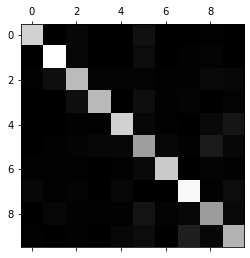

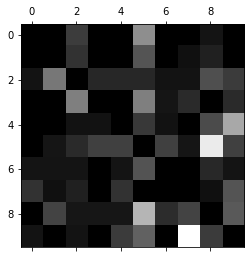

In [47]:
##3.5 에러 분석##
#가능성이 높은 모델의 모델 성능 향상을 위한 하나의 방법
#교차 검증별 정확도가 높은 SGD 모델로 계산  
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, x_train[:1000], y_train[:1000], cv=3)
conf_mx = confusion_matrix(y_train[:1000], y_train_pred)
print(conf_mx)

#오차행렬 이미지화(실제 클래스별 이미지에 대한 예측된 분류 정도) 
#행: 훈련 데이터(클래스별 이미지); 열: 훈련데이터 예측값(클래스별 분류된 이미지)
plt.matshow(conf_mx, cmap = plt.cm.gray)

#오차행렬 이미지화(오분류 비율)
#axis =1 은 row-wise add
row_sums = conf_mx.sum(axis=1, keepdims=True) #기존 행렬 유지
norm_conf_mx = conf_mx / row_sums

#오류만 집중적으로 분석하고자 주대각선만 0으로 채움)
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()


In [61]:
##3.6 다중 레이블 분류##
#k-최근접 이웃: 데이터로부터 거리가 가까운 k개의 다른 데이터의 레이블 참조하여 분류
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >=7) # 첫번째, 클래스가 7 이상인지
y_train_odd = (y_train % 2 == 1) # 두번째, 홀수 
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

#클래스 5에 대한 다중 레이블 분류 
knn_clf.predict([some_digit])

#F1 score 값 
from sklearn.metrics import f1_score
y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_multilabel, cv=3)
f1_score = f1_score(y_multilabel, y_train_knn_pred, average="macro") #모든 레이블의 가중치 동일
print('#f1 score:', format(np.round(f1_score,4)))

#f1 score: 0.9764


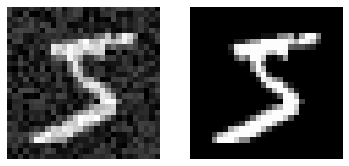

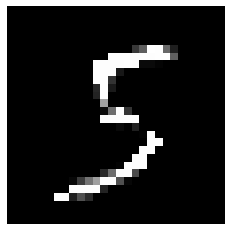

In [67]:
##3.7 다중 출력##
#레이블 하나 당 여러개 픽셀 값을 가질 수 있음
#예제에서는 이를 위해 이미지 잡음 제거 시스템 보여줌
noise = np.random.randint(0,100, (len(x_train), 784)) #픽셀에 노이즈 추가 
x_train_mod = x_train + noise
noise = np.random.randint(0,100, (len(x_test), 784))
x_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test

def plot_digit(data):
  image = data.reshape(28,28)
  plt.imshow(image, cmap = "gist_gray")
  plt.axis("off")

#노이즈 입힌 이미지, 깨끗한 이미지 
some_index = 0 #이미지 값 
plt.subplot(121); plot_digit(x_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

#분류모델 훈련키셔 이미지를 깨끗하게 만들었을 때의 결과
knn_clf.fit(x_train_mod, y_train_mod)
clean_digit = knn_clf.predict([x_test_mod[some_index]])
plot_digit(clean_digit)